In [273]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np

#pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.options.display.float_format = "{:,.0f}".format
#pd.reset_option('display.float_format')

In [274]:
df = pd.read_csv("HousePrice.csv")
df.head(9)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,"1,850,000,000","61,667"
1,60,1,True,True,True,Shahran,"1,850,000,000","61,667"
2,79,2,True,True,True,Pardis,"550,000,000","18,333"
3,95,2,True,True,True,Shahrake Qods,"902,500,000","30,083"
4,123,2,True,True,True,Shahrake Gharb,"7,000,000,000","233,333"
5,70,2,True,True,False,North Program Organization,"2,050,000,000","68,333"
6,87,2,True,True,True,Pardis,"600,000,000","20,000"
7,59,1,True,True,True,Shahran,"2,150,000,000","71,667"
8,54,2,True,True,False,Andisheh,"493,000,000","16,433"


In [251]:
df.describe()

,Room,Price,Price(USD)
count,"3,479","3,479","3,479"
mean,2,"5,359,022,711","178,634"
std,1,"8,099,934,524","269,998"
min,0,"3,600,000",120
25%,2,"1,418,250,000","47,275"
50%,2,"2,900,000,000","96,667"
75%,2,"6,000,000,000","200,000"
max,5,"92,400,000,000","3,080,000"


In [275]:
df.dtypes

Area           object
Room            int64
Parking          bool
Warehouse        bool
Elevator         bool
Address        object
Price         float64
Price(USD)    float64
dtype: object

In [276]:
df["Area"] = df["Area"].apply(lambda x: float(x.split()[0].replace(',', '')))

In [277]:
df['Area'].astype(str).astype(float)

0       63
1       60
2       79
3       95
4      123
        ..
3474    86
3475    83
3476    75
3477   105
3478    82
Name: Area, Length: 3479, dtype: float64

In [288]:
df.dtypes

Area          float64
Room            int64
Parking          bool
Warehouse        bool
Elevator         bool
Address        object
Price         float64
Price(USD)    float64
dtype: object

In [256]:
df.describe()

,Area,Room,Price,Price(USD)
count,"3,479","3,479","3,479","3,479"
mean,"8,744,000",2,"5,359,022,711","178,634"
std,"316,726,629",1,"8,099,934,524","269,998"
min,30,0,"3,600,000",120
25%,69,2,"1,418,250,000","47,275"
50%,90,2,"2,900,000,000","96,667"
75%,120,2,"6,000,000,000","200,000"
max,"16,160,000,000",5,"92,400,000,000","3,080,000"


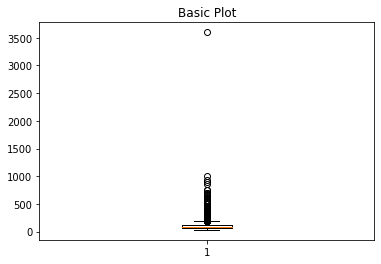

In [283]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(df.Area)
plt.show()

In [278]:
df.sort_values(by='Area', ascending=False).head(9)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
709,"16,160,000,000",3,True,True,True,Pasdaran,"16,160,000,000","538,667"
1604,"8,400,000,000",2,True,True,True,Gheitarieh,"8,700,000,000","290,000"
570,"3,310,000,000",2,True,True,True,Ostad Moein,"3,310,000,000","110,333"
2802,"2,550,000,000",2,True,True,True,Central Janatabad,"2,550,000,000","85,000"
2171,"3,600",2,False,False,False,Shahryar,"9,720,000,000","324,000"
807,"1,000",2,True,True,False,Damavand,"7,000,000,000","233,333"
1694,929,5,True,True,False,Zafar,"80,000,000,000","2,666,667"
1974,900,3,True,True,False,Damavand,"8,500,000,000","283,333"
573,863,2,True,True,True,Gheitarieh,"7,830,000,000","261,000"


In [279]:
df = df.drop([709, 1604, 570, 2802])

In [280]:
df.sort_values(by='Area', ascending=False).head(9)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
2171,"3,600",2,False,False,False,Shahryar,"9,720,000,000","324,000"
807,"1,000",2,True,True,False,Damavand,"7,000,000,000","233,333"
1694,929,5,True,True,False,Zafar,"80,000,000,000","2,666,667"
1974,900,3,True,True,False,Damavand,"8,500,000,000","283,333"
573,863,2,True,True,True,Gheitarieh,"7,830,000,000","261,000"
831,750,5,True,True,True,Mahmoudieh,"75,000,000,000","2,500,000"
3115,750,5,True,True,False,Varamin - Beheshti,"3,500,000,000","116,667"
1810,705,5,True,True,False,Abazar,"91,000,000,000","3,033,333"
2481,700,3,True,True,False,Damavand,"4,500,000,000","150,000"


In [281]:
df.isna().sum() 

Area           0
Room           0
Parking        0
Warehouse      0
Elevator       0
Address       23
Price          0
Price(USD)     0
dtype: int64

In [285]:
print(df.shape)

(3475, 8)


In [290]:
df = df.dropna()
print(df.shape)

(3452, 8)


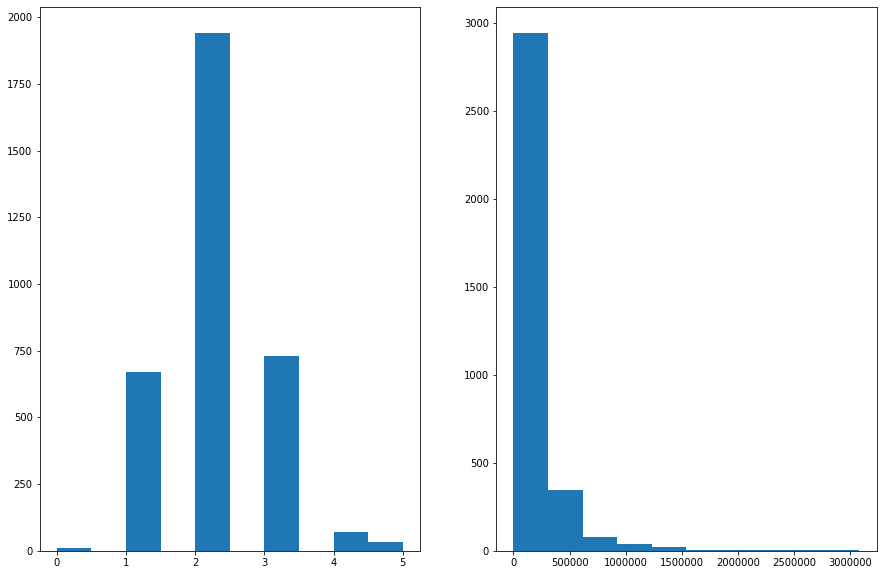

In [289]:
fig0, (ax1,ax2) = plt.subplots(1,2, figsize=(15,10))

ax1.hist(df["Room"])
ax2.ticklabel_format(useOffset=False, style='plain')

ax2.hist(df["Price(USD)"])
ax2.ticklabel_format(useOffset=False, style='plain')
plt.show()

In [291]:
Parking = df['Parking'].value_counts()
print(Parking)
print(' ')

Warehouse = df['Warehouse'].value_counts()
print(Warehouse)
print(' ')

Elevator = df['Elevator'].value_counts()
print(Elevator)


True     2925
False     527
Name: Parking, dtype: int64
 
True     3158
False     294
Name: Warehouse, dtype: int64
 
True     2717
False     735
Name: Elevator, dtype: int64


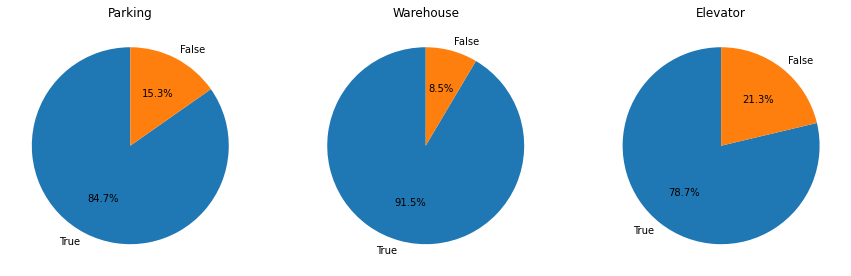

In [292]:
fig1, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(15,15)) 

labels = 'True', 'False'
ax1.pie([Parking[1], Parking[0]], labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.set_title("Parking")

labels = 'True', 'False'
ax2.pie([Warehouse[1], Warehouse[0]], labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax2.set_title("Warehouse")

labels = 'True', 'False'
ax3.pie([Elevator[1], Elevator[0]], labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax3.set_title("Elevator")

plt.show()



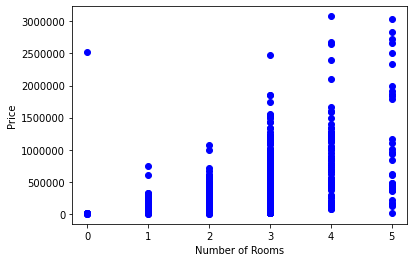

In [296]:
plt.scatter(df['Room'], df['Price(USD)'],  color='blue')
plt.xlabel("Number of Rooms")
plt.ylabel("Price")
plt.ticklabel_format(useOffset=False, style='plain')
plt.show()

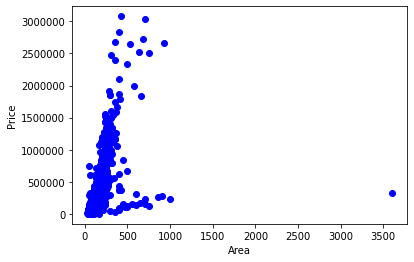

In [295]:
plt.scatter(df['Area'], df['Price(USD)'],  color='blue')
plt.xlabel("Area")
plt.ylabel("Price")
plt.ticklabel_format(useOffset=False, style='plain')
plt.show()

In [301]:
df.sort_values(by='Price', ascending=False).head(9)


,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
1707,420,4,True,True,True,Zaferanieh,"92,400,000,000","3,080,000"
1810,705,5,True,True,False,Abazar,"91,000,000,000","3,033,333"
430,400,5,True,True,False,Lavasan,"85,000,000,000","2,833,333"
819,680,5,True,True,False,Ekhtiarieh,"81,600,000,000","2,720,000"
1332,350,4,True,True,True,Niavaran,"80,500,000,000","2,683,333"
1694,929,5,True,True,False,Zafar,"80,000,000,000","2,666,667"
3051,530,4,True,True,True,Dorous,"79,500,000,000","2,650,000"
3107,630,0,False,False,False,Tajrish,"75,600,000,000","2,520,000"
831,750,5,True,True,True,Mahmoudieh,"75,000,000,000","2,500,000"
